# Oh Hello There ! Here is neural network for binary classification like cat or non cat it can work for any binary claasification data here i am using cat vs non cat

It is in five part
<br>
1. import of libraries 
<br>
2. load of data set
<br>
3. Initializing parameters
<br>
4. Calculating the cost function and its gradient
<br>
5. Using an optimization algorithm (gradient descent)

In [4]:
#load of libires 
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimageb
from dnn_app_utils_v2 import *

%matplotlib inline

In [5]:
#load of data set

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_data()

y = [1], it's a 'cat' picture.


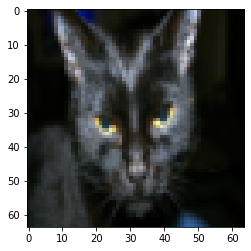

In [6]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [8]:
#here we see no of training and test example 
# and also see Height/width of images 
# and also see shape of traing and testing set 
m_train = train_set_x_orig.shape[0] 
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [10]:
#here we are reshaping the data so that traing and testing of model can be easy
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let's standardize our dataset.
Here we are using 255 because it is max value for each piaxle but we can use the method like 
X=X_flat/max(X_flat) means dividing the data set by its max value

In [29]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<a name='3'></a>
## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

In [ ]:
#upper image is not mine it is from coursera i found it on web :)
#here we start our model making :) 

## first of all we define some functions and initilize parameters for model

In [30]:
#first one is sigmoid 
def sigmoid(z):
    #    z -- A scalar or numpy array of any size.
    g=1/(1+np.exp(-z))
    return g



In [19]:
#sigmoid(10)

0.9999546021312976

In [31]:
#here we are initilize parameters with zeros 
def initilize_with_zero(dim):
    #here dim = dimension of data set
    w=np.zeros((dim,1))
    b=0
    return w,b

In [32]:
#initilize_with_zero(10)

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 0)

In [63]:
#here we are string algorithms called back propgation and forward propogation
def propagate(w,b,X,Y):
    '''w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)'''
    m=X.shape[1]
    #activation function 
    #forward propogation
    A=sigmoid(np.dot(w.T,X)+b)
    #comput cost 
    cost=(-1/m)*np.sum((Y*np.log(A))+(1-Y)*np.log(1-A))
    #backpropogation
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = 1/m*np.sum(A-Y) 
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [64]:
'''w =  np.array([[1.], [2.]])
b = 2.
X =np.array([[1., 2., -1.], [3., 4., -3.2]])
Y = np.array([[1, 0, 1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print(A)
print(Y)
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
[[0.99987661 0.99999386 0.00449627]]
[[1 0 1]]
db = 0.001455578136784208
cost = 5.801545319394553


In [68]:
#here we are doing optimization
def optimization(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w=w
    b=b
    costs=[]
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        dw=grads["dw"]
        db=grads["db"]
        # update rule
        #updating parameters for better accuracy
        w=w-(learning_rate*dw)
        b=b-(learning_rate*db)
        if i%100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [69]:
'''params, grads, costs = optimization(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652
Costs = [array(5.80154532)]


In [70]:
#here we go for prediction 
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction = np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    A=sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        #here rule is if A>0.5 then Y=1 else Y=0
        if A[0,i]>0.5:
            Y_prediction[0, i]=1
        else:
            Y_prediction[0 ,i]=0
    return Y_prediction        

In [71]:
'''w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))'''

predictions = [[1. 1. 0.]]


In [72]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    
    w, b = initilize_with_zero(X_train.shape[0])
    params, grads, costs = optimization(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train) 
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


    


In [91]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 1: 1.120174
Cost after iteration 2: 2.112718
Cost after iteration 3: 3.199729
Cost after iteration 4: 0.810026
Cost after iteration 5: 1.887411
Cost after iteration 6: 3.188168
Cost after iteration 7: 0.794978
Cost after iteration 8: 1.870697
Cost after iteration 9: 3.151356
Cost after iteration 10: 0.764848
Cost after iteration 11: 1.802202
Cost after iteration 12: 3.113051
Cost after iteration 13: 0.735612
Cost after iteration 14: 1.721601
Cost after iteration 15: 3.069842
Cost after iteration 16: 0.705166
Cost after iteration 17: 1.622766
Cost after iteration 18: 3.018224
Cost after iteration 19: 0.671908
Cost after iteration 20: 1.496343
Cost after iteration 21: 2.949022
Cost after iteration 22: 0.632334
Cost after iteration 23: 1.313921
Cost after iteration 24: 2.828350
Cost after iteration 25: 0.577556
Cost after iteration 26: 0.966709
Cost after iteration 27: 2.416880
Cost after iteration 28: 0.559422
Cost after iteration 29:

Cost after iteration 261: 0.917664
Cost after iteration 262: 0.769006
Cost after iteration 263: 1.349437
Cost after iteration 264: 0.540228
Cost after iteration 265: 0.937871
Cost after iteration 266: 0.749742
Cost after iteration 267: 1.310831
Cost after iteration 268: 0.553100
Cost after iteration 269: 0.957730
Cost after iteration 270: 0.730448
Cost after iteration 271: 1.271536
Cost after iteration 272: 0.566049
Cost after iteration 273: 0.976576
Cost after iteration 274: 0.711513
Cost after iteration 275: 1.232166
Cost after iteration 276: 0.578607
Cost after iteration 277: 0.993565
Cost after iteration 278: 0.693422
Cost after iteration 279: 1.193572
Cost after iteration 280: 0.590191
Cost after iteration 281: 1.007740
Cost after iteration 282: 0.676715
Cost after iteration 283: 1.156777
Cost after iteration 284: 0.600179
Cost after iteration 285: 1.018183
Cost after iteration 286: 0.661890
Cost after iteration 287: 1.122817
Cost after iteration 288: 0.608038
Cost after iteration

Cost after iteration 533: 0.379301
Cost after iteration 534: 0.334880
Cost after iteration 535: 0.374749
Cost after iteration 536: 0.331731
Cost after iteration 537: 0.370224
Cost after iteration 538: 0.328581
Cost after iteration 539: 0.365727
Cost after iteration 540: 0.325433
Cost after iteration 541: 0.361259
Cost after iteration 542: 0.322287
Cost after iteration 543: 0.356821
Cost after iteration 544: 0.319144
Cost after iteration 545: 0.352414
Cost after iteration 546: 0.316006
Cost after iteration 547: 0.348038
Cost after iteration 548: 0.312872
Cost after iteration 549: 0.343695
Cost after iteration 550: 0.309745
Cost after iteration 551: 0.339386
Cost after iteration 552: 0.306624
Cost after iteration 553: 0.335111
Cost after iteration 554: 0.303512
Cost after iteration 555: 0.330872
Cost after iteration 556: 0.300409
Cost after iteration 557: 0.326669
Cost after iteration 558: 0.297315
Cost after iteration 559: 0.322503
Cost after iteration 560: 0.294233
Cost after iteration

Cost after iteration 778: 0.138069
Cost after iteration 779: 0.137937
Cost after iteration 780: 0.137806
Cost after iteration 781: 0.137676
Cost after iteration 782: 0.137546
Cost after iteration 783: 0.137418
Cost after iteration 784: 0.137290
Cost after iteration 785: 0.137162
Cost after iteration 786: 0.137036
Cost after iteration 787: 0.136910
Cost after iteration 788: 0.136785
Cost after iteration 789: 0.136660
Cost after iteration 790: 0.136536
Cost after iteration 791: 0.136413
Cost after iteration 792: 0.136290
Cost after iteration 793: 0.136168
Cost after iteration 794: 0.136046
Cost after iteration 795: 0.135925
Cost after iteration 796: 0.135805
Cost after iteration 797: 0.135685
Cost after iteration 798: 0.135565
Cost after iteration 799: 0.135446
Cost after iteration 800: 0.135328
Cost after iteration 801: 0.135210
Cost after iteration 802: 0.135092
Cost after iteration 803: 0.134975
Cost after iteration 804: 0.134858
Cost after iteration 805: 0.134742
Cost after iteration

Cost after iteration 1042: 0.113293
Cost after iteration 1043: 0.113220
Cost after iteration 1044: 0.113146
Cost after iteration 1045: 0.113073
Cost after iteration 1046: 0.113000
Cost after iteration 1047: 0.112927
Cost after iteration 1048: 0.112854
Cost after iteration 1049: 0.112781
Cost after iteration 1050: 0.112708
Cost after iteration 1051: 0.112635
Cost after iteration 1052: 0.112563
Cost after iteration 1053: 0.112490
Cost after iteration 1054: 0.112418
Cost after iteration 1055: 0.112346
Cost after iteration 1056: 0.112273
Cost after iteration 1057: 0.112201
Cost after iteration 1058: 0.112129
Cost after iteration 1059: 0.112058
Cost after iteration 1060: 0.111986
Cost after iteration 1061: 0.111914
Cost after iteration 1062: 0.111842
Cost after iteration 1063: 0.111771
Cost after iteration 1064: 0.111700
Cost after iteration 1065: 0.111628
Cost after iteration 1066: 0.111557
Cost after iteration 1067: 0.111486
Cost after iteration 1068: 0.111415
Cost after iteration 1069: 0

Cost after iteration 1304: 0.096916
Cost after iteration 1305: 0.096862
Cost after iteration 1306: 0.096809
Cost after iteration 1307: 0.096756
Cost after iteration 1308: 0.096703
Cost after iteration 1309: 0.096649
Cost after iteration 1310: 0.096596
Cost after iteration 1311: 0.096543
Cost after iteration 1312: 0.096490
Cost after iteration 1313: 0.096438
Cost after iteration 1314: 0.096385
Cost after iteration 1315: 0.096332
Cost after iteration 1316: 0.096279
Cost after iteration 1317: 0.096226
Cost after iteration 1318: 0.096174
Cost after iteration 1319: 0.096121
Cost after iteration 1320: 0.096069
Cost after iteration 1321: 0.096016
Cost after iteration 1322: 0.095964
Cost after iteration 1323: 0.095912
Cost after iteration 1324: 0.095859
Cost after iteration 1325: 0.095807
Cost after iteration 1326: 0.095755
Cost after iteration 1327: 0.095703
Cost after iteration 1328: 0.095651
Cost after iteration 1329: 0.095599
Cost after iteration 1330: 0.095547
Cost after iteration 1331: 0

Cost after iteration 1557: 0.085030
Cost after iteration 1558: 0.084988
Cost after iteration 1559: 0.084947
Cost after iteration 1560: 0.084906
Cost after iteration 1561: 0.084864
Cost after iteration 1562: 0.084823
Cost after iteration 1563: 0.084782
Cost after iteration 1564: 0.084741
Cost after iteration 1565: 0.084700
Cost after iteration 1566: 0.084659
Cost after iteration 1567: 0.084618
Cost after iteration 1568: 0.084577
Cost after iteration 1569: 0.084536
Cost after iteration 1570: 0.084495
Cost after iteration 1571: 0.084454
Cost after iteration 1572: 0.084413
Cost after iteration 1573: 0.084373
Cost after iteration 1574: 0.084332
Cost after iteration 1575: 0.084291
Cost after iteration 1576: 0.084251
Cost after iteration 1577: 0.084210
Cost after iteration 1578: 0.084169
Cost after iteration 1579: 0.084129
Cost after iteration 1580: 0.084088
Cost after iteration 1581: 0.084048
Cost after iteration 1582: 0.084007
Cost after iteration 1583: 0.083967
Cost after iteration 1584: 0

Cost after iteration 1819: 0.075379
Cost after iteration 1820: 0.075346
Cost after iteration 1821: 0.075314
Cost after iteration 1822: 0.075281
Cost after iteration 1823: 0.075248
Cost after iteration 1824: 0.075216
Cost after iteration 1825: 0.075183
Cost after iteration 1826: 0.075150
Cost after iteration 1827: 0.075118
Cost after iteration 1828: 0.075085
Cost after iteration 1829: 0.075053
Cost after iteration 1830: 0.075020
Cost after iteration 1831: 0.074988
Cost after iteration 1832: 0.074955
Cost after iteration 1833: 0.074923
Cost after iteration 1834: 0.074890
Cost after iteration 1835: 0.074858
Cost after iteration 1836: 0.074826
Cost after iteration 1837: 0.074793
Cost after iteration 1838: 0.074761
Cost after iteration 1839: 0.074729
Cost after iteration 1840: 0.074696
Cost after iteration 1841: 0.074664
Cost after iteration 1842: 0.074632
Cost after iteration 1843: 0.074600
Cost after iteration 1844: 0.074568
Cost after iteration 1845: 0.074536
Cost after iteration 1846: 0

y = 1, you predicted that it is a "cat" picture.


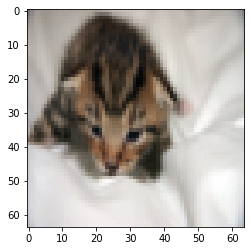

In [74]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

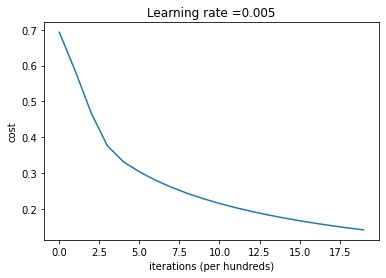

In [75]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------

Training a model with learning rate: 0.005

-------------------------------------------------------



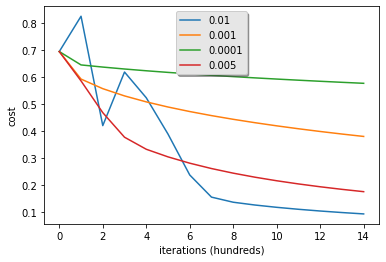

In [93]:
learning_rates = [0.01, 0.001, 0.0001 ,0.005]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()